In [ ]:
"""
Visualization of school statistics

"""

In [1]:
import re, itertools
import networkx as nx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/katiehuang/Documents/metis/projects/onl_ds5_project_4/py')
from word_cloud import *
import importlib

In [2]:
# Load data
speech_speaker_school = pd.read_pickle('../dump/speech_speaker_school')
speech_df = pd.read_pickle('../dump/speech_df')

In [3]:
speech_speaker_school

,speaker,profession,born,age,origin,category,year,school,transcript,length,age_then,latitude,longitude
0,SIDDHARTHA MUKHERJEE,American-Indian physician,1970,50,New Delhi India,Med/Law,2018,Univ. of Southern California,I wish someone had told me at my own commenc...,14487,48,34.0205,-118.2856
1,JESMYN WARD,American novelist,1977,43,De Lisle MS,Publish,2018,Tulane University,Persist. Be patient. Be well. Good morning....,14063,41,29.9353,-90.1227
2,DAVID SEDARIS,American humorist,1956,64,Johnson City NY,Entertainment,2018,OBERLIN COLLEGE,"Thank you so much for having me, and for prese...",10587,62,41.2929,-82.2186
3,NIGHT SHYAMALAN,American-Indian filmmaker,1970,50,Mahé India,Entertainment,2018,DREXEL UNIVERSITY,\nwhat's up dragons alright let's start\n\nwit...,26406,48,39.9564,-75.1887
6,ABBY WAMBACK,American soccer player,1980,40,Rochester NY,Sport,2018,Barnard College,"Failure is not something to be ashamed of, ...",15866,38,40.8096,-73.9635
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,CARLY FIORINA,American businesswoman,1954,66,Austin TX,Tech/Business,2000,MIT,I'd like to start my remarks this morning with...,17740,46,42.360091,-71.09416
68,CALLIE KHOURI,American television screenwriter,1957,63,San Antonio TX,Publish,1994,SWEET BRIAR COLLEGE,"I'm so happy to be here today. Now, I don't wa...",19940,37,37.5576478,-79.0828644
69,NAOMI WOLF,American author,1962,58,San Francisco CA,Publish,1992,SCRIPPS COLLEGE,Even the best of revolutions can go awry when ...,7773,30,34.1039266,-117.7101745
70,MEREDITH MONK,American composer,1942,78,New York NY,Art,1985,SARAH LAWRENCE COLLEGE,"President Lichman, members of the faculty, alu...",9255,43,40.93459,-73.8455821


In [4]:
speech_speaker_school['latitude'] = speech_speaker_school['latitude'].astype('float')
speech_speaker_school['longitude'] = speech_speaker_school['longitude'].astype('float')

In [5]:
speech_speaker_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 71
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   speaker     331 non-null    object 
 1   profession  331 non-null    object 
 2   born        331 non-null    int64  
 3   age         331 non-null    int64  
 4   origin      331 non-null    object 
 5   category    331 non-null    object 
 6   year        331 non-null    int64  
 7   school      331 non-null    object 
 8   transcript  331 non-null    object 
 9   length      331 non-null    int64  
 10  age_then    331 non-null    int64  
 11  latitude    331 non-null    float64
 12  longitude   331 non-null    float64
dtypes: float64(2), int64(5), object(6)
memory usage: 36.2+ KB


## Categorize location of schools (West, Central, East)

In [6]:
# West coast: longitude < -109
# Central: -109 < longitude < -88
# East: longitude > -88

In [7]:
speech_speaker_school['region'] = speech_speaker_school['longitude'].apply(lambda x: 'west' if x < -109 else(\
                                                                            'central' if -109 < x < -88\
                                                                            else 'east'))

In [8]:
speech_speaker_school.head()

,speaker,profession,born,age,origin,category,year,school,transcript,length,age_then,latitude,longitude,region
0,SIDDHARTHA MUKHERJEE,American-Indian physician,1970,50,New Delhi India,Med/Law,2018,Univ. of Southern California,I wish someone had told me at my own commenc...,14487,48,34.0205,-118.2856,west
1,JESMYN WARD,American novelist,1977,43,De Lisle MS,Publish,2018,Tulane University,Persist. Be patient. Be well. Good morning....,14063,41,29.9353,-90.1227,central
2,DAVID SEDARIS,American humorist,1956,64,Johnson City NY,Entertainment,2018,OBERLIN COLLEGE,"Thank you so much for having me, and for prese...",10587,62,41.2929,-82.2186,east
3,NIGHT SHYAMALAN,American-Indian filmmaker,1970,50,Mahé India,Entertainment,2018,DREXEL UNIVERSITY,\nwhat's up dragons alright let's start\n\nwit...,26406,48,39.9564,-75.1887,east
6,ABBY WAMBACK,American soccer player,1980,40,Rochester NY,Sport,2018,Barnard College,"Failure is not something to be ashamed of, ...",15866,38,40.8096,-73.9635,east


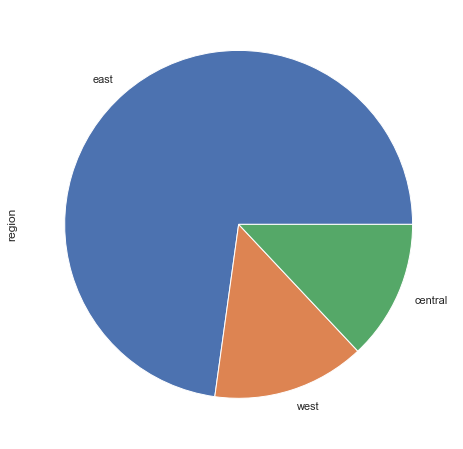

In [9]:
plt.rcParams['figure.figsize'] = [20, 8]
speech_speaker_school.region.value_counts().plot(kind='pie');

In [10]:
# Pickle
speech_speaker_school.to_pickle('../dump/speech_speaker_region')